<a href="https://colab.research.google.com/github/AditiTripathi30/Car_Price_Prediction/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures #We cannot use this.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Audi_New.csv')

In [7]:
print(len(df))

10668


In [8]:
print(df.shape)

(10668, 9)


In [9]:
display(df.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [10]:
display(df.isna().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
display(df.notna().sum())

model           10668
year            10668
price           10668
transmission    10668
mileage         10668
fuelType        10668
tax             10668
mpg             10668
engineSize      10668
dtype: int64

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [13]:
display (df.describe())

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [14]:
X = df.iloc[:,[0,1,3,4,5,6,7,8]]
display(X.shape)
display(X)

(10668, 8)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,Automatic,8646,Petrol,150,47.9,1.4


In [15]:
Y = df.iloc[:, [2]]
display(Y.shape)
display(Y)

(10668, 1)

,price
0,12500
1,16500
2,11000
3,16800
4,17300
...,...
10663,16999
10664,16999
10665,17199
10666,19499


In [16]:
display((X).head(5))

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


In [17]:
display(pd.DataFrame(X).head(5))

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


In [18]:
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))

(10668, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,A1,2017,15735,Petrol,150,55.4,1.4
1,1.0,0.0,0.0,A6,2016,36203,Diesel,20,64.2,2.0
2,0.0,1.0,0.0,A1,2016,29946,Petrol,30,55.4,1.4
3,1.0,0.0,0.0,A4,2017,25952,Diesel,145,67.3,2.0
4,0.0,1.0,0.0,A3,2019,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,A3,2020,4018,Petrol,145,49.6,1.0
10664,0.0,1.0,0.0,A3,2020,1978,Petrol,150,49.6,1.0
10665,0.0,1.0,0.0,A3,2020,609,Petrol,150,49.6,1.0
10666,1.0,0.0,0.0,Q3,2017,8646,Petrol,150,47.9,1.4


In [19]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,3] = le1.fit_transform(X[:,3])
display (X)

array([[0.0, 1.0, 0.0, ..., 150, 55.4, 1.4],
       [1.0, 0.0, 0.0, ..., 20, 64.2, 2.0],
       [0.0, 1.0, 0.0, ..., 30, 55.4, 1.4],
       ...,
       [0.0, 1.0, 0.0, ..., 150, 49.6, 1.0],
       [1.0, 0.0, 0.0, ..., 150, 47.9, 1.4],
       [0.0, 1.0, 0.0, ..., 150, 47.9, 1.4]], dtype=object)

In [20]:
le1 = LabelEncoder()
X[:,6] = le1.fit_transform(X[:,6])
display(X)

array([[0.0, 1.0, 0.0, ..., 150, 55.4, 1.4],
       [1.0, 0.0, 0.0, ..., 20, 64.2, 2.0],
       [0.0, 1.0, 0.0, ..., 30, 55.4, 1.4],
       ...,
       [0.0, 1.0, 0.0, ..., 150, 49.6, 1.0],
       [1.0, 0.0, 0.0, ..., 150, 47.9, 1.4],
       [0.0, 1.0, 0.0, ..., 150, 47.9, 1.4]], dtype=object)

In [21]:
display(pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


In [23]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y , test_size = 0.2, random_state = 0)
print(X.shape, Y.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


In [24]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state = 0)
regression.fit(X_train, Y_train)
display(regression)

Y_final_pred = regression.predict(X)
display(Y_final_pred)
Y_pred = regression.predict(X_test)
display(Y_pred)
Y_train_pred = regression.predict(X_train)
display(Y_train_pred)

RandomForestRegressor(random_state=0)

array([12864.85, 16457.12, 11755.03, ..., 17642.77, 20217.97, 18360.66])

array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

array([14329.33, 28921.32, 11521.6 , ..., 22837.76, 17272.55, 44437.06])

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error
print('R2 Score:', r2_score(Y, Y_final_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_final_pred, Y))

print('R2 Score:', r2_score(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))

print('R2 Score:', r2_score(Y_train_pred, Y_train))
print("Mean Absolute Error:", mean_absolute_error(Y_train_pred, Y_train))
RandomForestRegressor(random_state=0)

R2 Score: 0.9854936957854944
Mean Absolute Error: 784.8616110361777
R2 Score: 0.9536134841307546
Mean Absolute Error: 1538.730980670462
R2 Score: 0.9933231314830271
Mean Absolute Error: 596.3501000449002


RandomForestRegressor(random_state=0)

In [27]:
Y_pred = regression.predict(X_test)
display(Y_pred)

array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error
print('R2 Score:', r2_score(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))

R2 Score: 0.9536134841307546
Mean Absolute Error: 1538.730980670462


In [30]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
print (cat.fit(X_train,Y_train))

Learning rate set to 0.057452
0:	learn: 11184.0694779	total: 51.6ms	remaining: 51.6s
1:	learn: 10690.2138498	total: 54.1ms	remaining: 27s
2:	learn: 10221.1011877	total: 62.7ms	remaining: 20.8s
3:	learn: 9778.8067263	total: 65.2ms	remaining: 16.2s
4:	learn: 9382.6454054	total: 72.7ms	remaining: 14.5s
5:	learn: 8989.9290587	total: 75.1ms	remaining: 12.4s
6:	learn: 8628.4892653	total: 78.2ms	remaining: 11.1s
7:	learn: 8280.9179062	total: 85.3ms	remaining: 10.6s
8:	learn: 7950.5476053	total: 87.6ms	remaining: 9.65s
9:	learn: 7636.7735365	total: 94.2ms	remaining: 9.33s
10:	learn: 7349.6084699	total: 96.8ms	remaining: 8.7s
11:	learn: 7084.0457263	total: 99ms	remaining: 8.15s
12:	learn: 6842.7060927	total: 107ms	remaining: 8.11s
13:	learn: 6608.0244743	total: 109ms	remaining: 7.68s
14:	learn: 6387.7285726	total: 116ms	remaining: 7.61s
15:	learn: 6170.1354894	total: 118ms	remaining: 7.27s
16:	learn: 5973.9133066	total: 121ms	remaining: 7s
17:	learn: 5780.4713044	total: 131ms	remaining: 7.13s
1

In [31]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,Y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3041.299579172001
RMSE value for k=  2 is: 2632.960709976729
RMSE value for k=  3 is: 2651.773286088826
RMSE value for k=  4 is: 2737.8308372855777
RMSE value for k=  5 is: 2765.6227869505437
RMSE value for k=  6 is: 2770.4076472080496
RMSE value for k=  7 is: 2823.751119388066
RMSE value for k=  8 is: 2865.356109227617
RMSE value for k=  9 is: 2973.8713056323713
RMSE value for k=  10 is: 3066.666899276797
RMSE value for k=  11 is: 3171.9930279393757
RMSE value for k=  12 is: 3262.9051971509784
RMSE value for k=  13 is: 3344.1463244886845
RMSE value for k=  14 is: 3407.7174166008763
RMSE value for k=  15 is: 3448.827321317035
RMSE value for k=  16 is: 3478.978388956772
RMSE value for k=  17 is: 3509.5986305812958
RMSE value for k=  18 is: 3555.5581220731488
RMSE value for k=  19 is: 3595.2703291254984
RMSE value for k=  20 is: 3627.3904765793077


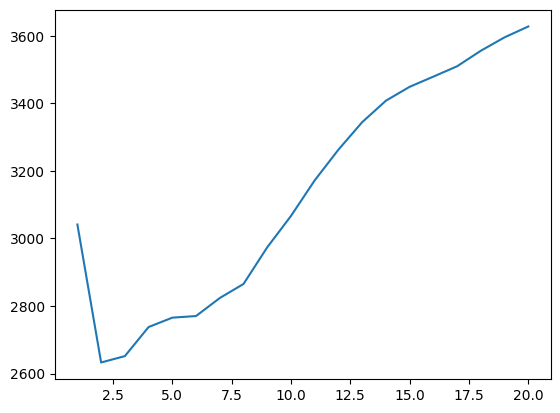

In [33]:
plt.plot(range(1,21),rmse_val)
plt.show()

In [34]:
acc_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    acc= r2_score (Y_test,Y_pred)
    acc_val.append(acc)
    print('Accuracy value for k= ' , K , 'is:', acc)

Accuracy value for k=  1 is: 0.9326897718734282
Accuracy value for k=  2 is: 0.9495511331710216
Accuracy value for k=  3 is: 0.9488276406250482
Accuracy value for k=  4 is: 0.945452370703374
Accuracy value for k=  5 is: 0.9443393147818293
Accuracy value for k=  6 is: 0.9441465488036711
Accuracy value for k=  7 is: 0.941974954331297
Accuracy value for k=  8 is: 0.9402524822217402
Accuracy value for k=  9 is: 0.9356413390254482
Accuracy value for k=  10 is: 0.9315622268489917
Accuracy value for k=  11 is: 0.9267804413234477
Accuracy value for k=  12 is: 0.9225232186979366
Accuracy value for k=  13 is: 0.9186170922913138
Accuracy value for k=  14 is: 0.9154935599976405
Accuracy value for k=  15 is: 0.9134423296037483
Accuracy value for k=  16 is: 0.911922268475484
Accuracy value for k=  17 is: 0.9103650124213727
Accuracy value for k=  18 is: 0.9080020344362457
Accuracy value for k=  19 is: 0.9059354981172427
Accuracy value for k=  20 is: 0.9042472455886421


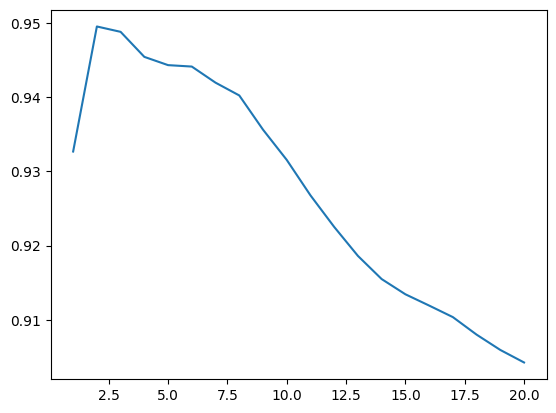

In [35]:
plt.plot(range(1,21),acc_val)
plt.show()

In [38]:
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train, Y_train)
print (model)

KNeighborsRegressor(n_neighbors=2)


In [39]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[14994. ]
 [23847.5]
 [29222.5]
 ...
 [45875.5]
 [30445. ]
 [ 9225.5]]


In [40]:
print (r2_score(Y_test,Y_pred))

0.9495511331710216


In [41]:
Y_final_pred = model.predict(X)
print (Y_pred)

[[14994. ]
 [23847.5]
 [29222.5]
 ...
 [45875.5]
 [30445. ]
 [ 9225.5]]


In [42]:
print (r2_score(Y,Y_final_pred))

0.9749011225122969


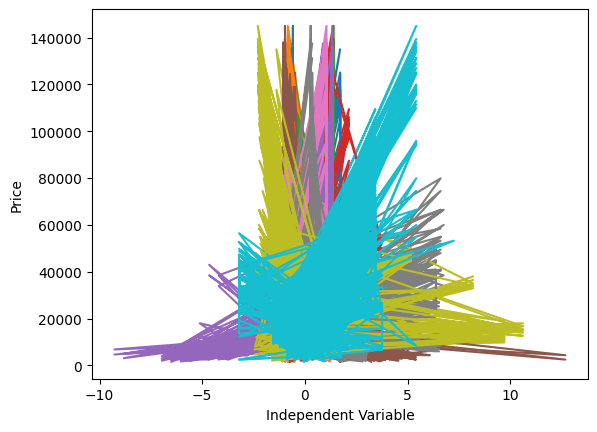

In [43]:
plt.plot (X,Y)
plt.plot (X,Y_final_pred)
plt.xlabel('Independent Variable')
plt.ylabel('Price')
plt.show()

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
print(dt)
DecisionTreeRegressor()

DecisionTreeRegressor()


DecisionTreeRegressor()

In [45]:
Y_pred = dt.predict(X_test)
print (Y_pred)

[15995. 24995. 26990. ... 46500. 30990.  9390.]


In [46]:
print (r2_score(Y_test,Y_pred))

0.9135007056472099


In [47]:
Y_final_pred = dt.predict(X)
print (Y_final_pred)

[12500. 16500. 11000. ... 17199. 19499. 16995.]


In [48]:
print (r2_score(Y,Y_final_pred))

0.981770707668593


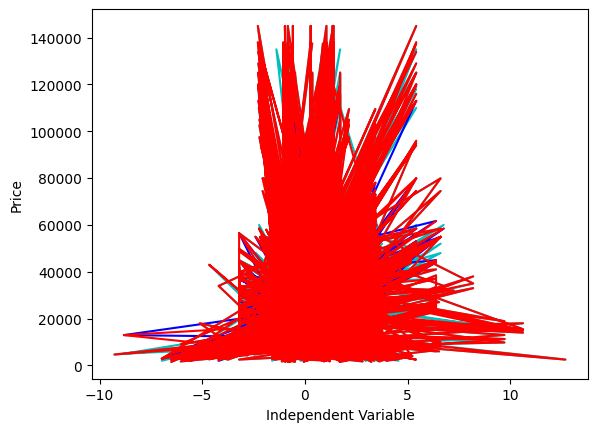

In [50]:
plt.plot (X,Y,'c')
plt.plot (X_test,Y_pred,'b')
plt.plot (X,Y_final_pred,'r')
plt.xlabel('Independent Variable')
plt.ylabel('Price')
plt.show()